# Video Preprocessing

Description

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import json

In [3]:
from video_analyzer import VideoAnalyzer
from preprocessor import Preprocessor

2025-03-30 01:21:32.601705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743265292.634902  154477 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743265292.639878  154477 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-30 01:21:32.660962: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
timestamp = "28032025"
path_to_root = "/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/"

In [5]:
metadata = pd.read_csv(os.path.join(
    path_to_root,
    "data",
    "raw",
    "combined",
    "target_dataset_video_metadata.csv"
    ))

In [6]:
i = 0
metadata_row = metadata.iloc[i].copy()
metadata_row

filename        ajudar_ne_1.mp4
label                    ajudar
data_source                  ne
frame_count                  44
fps                        12.0
duration_sec                  3
width                       240
height                      176
Name: 0, dtype: object

## Initialize VideoAnalyzer

In [4]:
params = {}
params["motion_start_threshold"] = 0.2
# params["verbose"] =False
params["reuse_results"] = True

In [7]:
metadata_row.loc['motion_end_threshold'] = 0.3

In [8]:
analyzer = VideoAnalyzer(
    metadata_row,
    timestamp,
    path_to_root,
    params,
    # verbose=False
)

Using parameters from metadata:
	motion_end_threshold = 0.3
Using parameters from params dict:
	motion_start_threshold = 0.2
	reuse_results = True
Using parameters from default values:
	motion_avg_weights = {'basic': 0.3, 'bg_sub': 0.7}
	moving_avg_window_duration = 0.2
	motion_threshold_method = simple
	pose_static_image_mode = False
	pose_model_complexity = 1
	pose_smooth_landmarks = True
	pose_min_detection_confidence = 0.5
	pose_min_tracking_confidence = 0.5
Initialized VideoAnalyzer for ajudar_ne_1.mp4
Video properties: 12.0 fps, 240x176, 3.00 seconds


## Motion Detection

In [9]:
analyzer.motion_data

{}

In [10]:
motion_data = analyzer.motion_detect()

Loaded motion detection results from versionA
window_duration: 0.2 seconds, at 12.0 fps = 2 frame window_size


In [11]:
motion_data.keys()

dict_keys(['basic_raw', 'bg_sub_raw', 'basic_normalized', 'bg_sub_normalized', 'weighted_avg', 'smoothed'])

In [12]:
motion_result = analyzer.motion_analyze()

Analyzing motion using simple method with thresholds 0.2/0.3
Motion detected from frame 6 to 35 (2.42 seconds)


In [13]:
motion_result

{'start_frame': 6,
 'end_frame': 35,
 'start_time': 0.5,
 'end_time': 2.9166666666666665,
 'duration_frames': 29,
 'duration_sec': 2.4166666666666665}

In [14]:
analyzer.motion_data.keys()

dict_keys(['basic_raw', 'bg_sub_raw', 'basic_normalized', 'bg_sub_normalized', 'weighted_avg', 'smoothed', 'analysis'])

## Pose Estimation

In [15]:
analyzer.pose_estimation_dir

'/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLandmarks'

In [16]:
pose_data = analyzer.pose_detect()

Loaded pose estimation results from versionA


In [17]:
analyzer.pose_data.keys()

dict_keys(['params', 'landmarks_raw'])

In [18]:
pose_result = analyzer.pose_analyze()

Analyzing pose data...
Pose analysis complete
Horizontal offsets: {'shoulders': {'mean': 0.485783673484217, 'median': 0.48647886514663696, 'max': 0.5011348724365234, 'min': 0.4693884402513504}, 'face': {'mean': 0.4617192352359945, 'median': 0.4654083698987961, 'max': 0.4876764416694641, 'min': 0.43568241596221924}}
Vertical offsets: {'shoulders': {'mean': 0.5419730218974027, 'median': 0.541060134768486, 'max': 0.5612127780914307, 'min': 0.5202731192111969}, 'face': {'mean': 0.2606092748994177, 'median': 0.2586185485124588, 'max': 0.2975011467933655, 'min': 0.2298063486814499}}
Landmark measurements: {'shoulder_width': {'mean': 0.3144603380209611, 'median': 0.322241749436065, 'max': 0.33947361415925253}, 'hip_width': {'mean': 0.22059858718294068, 'median': 0.22124750378219374, 'max': 0.23112824713376973}, 'shoulder_to_hip': {'mean': 0.6164409528964432, 'median': 0.6150278579324255, 'max': 0.6438777743608111}, 'left_arm_length': {'mean': 0.41851797791257545, 'median': 0.35445257673761893

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1743262424.501879  147650 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743262424.542256  147653 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743262424.546342  147653 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743262424.548073  147651 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743262424.551825  147649 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743262424.558555  147

## Save Analysis Info

In [19]:
analysis_info = analyzer.save_analysis_info()

Saved analysis info to /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/Analysis/28032025/individual_json/ajudar_ne_1_analysis_info.json


In [20]:
analysis_info.keys()


dict_keys(['metadata', 'params', 'motion_analysis', 'pose_analysis'])

## Make Preprocessing Params

### Load analysis info

In [7]:
# load json as dict
with open(os.path.join(
    path_to_root, 
    "data", 
    "interim", 
    "Analysis", 
    timestamp, 
    "individual_json", 
    metadata_row["filename"].split(".")[0] + "_analysis_info.json"
    )) as f:
    analysis_info = json.load(f)

analysis_info.keys()

dict_keys(['metadata', 'params', 'motion_analysis', 'pose_analysis'])

In [8]:
def nested_dict_to_df(nested_dict, prefix=''):
    flat_dict = {}
    
    def flatten(d, parent_key=''):
        for key, value in d.items():
            new_key = f"{parent_key}_{key}" if parent_key else key
            
            if isinstance(value, dict):
                flatten(value, new_key)
            else:
                flat_dict[new_key] = value
    
    flatten(nested_dict)
    return pd.DataFrame([flat_dict])

In [9]:
nested_dict_to_df(analysis_info).columns

Index(['metadata_filename', 'metadata_fps', 'metadata_width',
       'metadata_height', 'metadata_duration_sec', 'metadata_frame_count',
       'metadata_data_source', 'metadata_label',
       'metadata_motion_detection_version', 'metadata_pose_detection_version',
       'metadata_timestamp', 'params_motion_avg_weights_basic',
       'params_motion_avg_weights_bg_sub', 'params_moving_avg_window_duration',
       'params_motion_threshold_method', 'params_motion_start_threshold',
       'params_motion_end_threshold', 'params_pose_static_image_mode',
       'params_pose_model_complexity', 'params_pose_smooth_landmarks',
       'params_pose_min_detection_confidence',
       'params_pose_min_tracking_confidence', 'params_reuse_results',
       'motion_analysis_start_frame', 'motion_analysis_end_frame',
       'motion_analysis_start_time', 'motion_analysis_end_time',
       'motion_analysis_duration_frames', 'motion_analysis_duration_sec',
       'pose_analysis_frames_with_landmarks',
      

### Get/Make Parameters for preprocessor
Preprocessor requires:
- start_frame 
- end_frame 
- horizontal_offset 
- x_scale_factor 
- y_scale_factor
- vertical_offset 
- target_duration

#### Start Frame / End Frame

In [10]:
start_frame = analysis_info["motion_analysis"]["start_frame"]
end_frame = analysis_info["motion_analysis"]["end_frame"]

#### Horizontal Offset

In [11]:
analysis_info["pose_analysis"]["horizontal_offsets"]

{'shoulders': {'mean': 0.485783673484217,
  'median': 0.48647886514663696,
  'max': 0.5011348724365234,
  'min': 0.4693884402513504},
 'face': {'mean': 0.4617192352359945,
  'median': 0.4654083698987961,
  'max': 0.4876764416694641,
  'min': 0.43568241596221924}}

In [41]:
shoulders_median = analysis_info["pose_analysis"]["horizontal_offsets"]["shoulders"]["median"]
face_median = analysis_info["pose_analysis"]["horizontal_offsets"]["face"]["median"]

shoulders_reference = 0.5
face_reference = 0.5

shoulders_offset = shoulders_reference - shoulders_median
face_offset = face_reference - face_median

shoulders_weight = 0.7
face_weight = 0.3
horizontal_offset = shoulders_weight * shoulders_offset + face_weight * face_offset
horizontal_offset

0.019842283427715303

#### X Scale Factor, Y Scale Factor

In [13]:
analysis_info["pose_analysis"]["landmark_measurements"]

{'shoulder_width': {'mean': 0.3144603380209611,
  'median': 0.322241749436065,
  'max': 0.33947361415925253},
 'hip_width': {'mean': 0.22059858718294068,
  'median': 0.22124750378219374,
  'max': 0.23112824713376973},
 'shoulder_to_hip': {'mean': 0.6164409528964432,
  'median': 0.6150278579324255,
  'max': 0.6438777743608111},
 'left_arm_length': {'mean': 0.41851797791257545,
  'median': 0.35445257673761893,
  'max': 0.6365173728742255},
 'right_arm_length': {'mean': 0.4073253618025028,
  'median': 0.3493312671653056,
  'max': 0.6097211046168401},
 'face_width': {'mean': 0.144945958247455,
  'median': 0.14580394657344362,
  'max': 0.14898741714499494},
 'face_height': {'mean': 0.2468952515196514,
  'median': 0.24642677122759657,
  'max': 0.2527068498790681},
 'top_head_to_shoulders': {'mean': 0.38963987068696454,
  'median': 0.40148501098155975,
  'max': 0.42446762323379517},
 'nose_to_shoulders': {'mean': 0.281363746997985,
  'median': 0.29588789492845535,
  'max': 0.32388289272785187

In [14]:
# Measurements from the video
## Horizontal
shoulder_width = analysis_info["pose_analysis"]["landmark_measurements"]["shoulder_width"]["mean"]
face_width = analysis_info["pose_analysis"]["landmark_measurements"]["face_width"]["mean"]
## Vertical
face_height = analysis_info["pose_analysis"]["landmark_measurements"]["face_height"]["mean"]
chin_to_shoulders = analysis_info["pose_analysis"]["landmark_measurements"]["chin_to_shoulders"]["median"]

# Reference values to scale to
## Horizontal
reference_shoulder_width = 0.3
reference_face_width = 0.15
## Vertical
reference_face_height = 0.2
reference_chin_to_shoulders = 0.15

# Scale Factors
## Horizontal
shoulder_width_weight = 0.7
face_width_weight = 0.3
x_scale_factor = shoulder_width_weight * reference_shoulder_width / shoulder_width + face_width_weight * reference_face_width / face_width
## Vertical
face_height_weight = 0.7
chin_to_shoulders_weight = 0.3
y_scale_factor = face_height_weight * reference_face_height / face_height + chin_to_shoulders_weight * reference_chin_to_shoulders / chin_to_shoulders

x_scale_factor, y_scale_factor

(0.9782713052799648, 0.8576274074905624)

In [15]:
# TODO: Plot the measured landmarks and the reference landmarks side by side

#### Vertical Offset

In [16]:
analysis_info["pose_analysis"]["vertical_offsets"]


{'shoulders': {'mean': 0.5419730218974027,
  'median': 0.541060134768486,
  'max': 0.5612127780914307,
  'min': 0.5202731192111969},
 'face': {'mean': 0.2606092748994177,
  'median': 0.2586185485124588,
  'max': 0.2975011467933655,
  'min': 0.2298063486814499}}

In [38]:
# Measured
shoulders_median = analysis_info["pose_analysis"]["vertical_offsets"]["shoulders"]["median"]
face_median = analysis_info["pose_analysis"]["vertical_offsets"]["face"]["median"]
# Reference
reference_shoulders = 0.5
reference_face = 0.25

shoulders_offset = reference_shoulders - shoulders_median
face_offset = reference_face - face_median

# Weighted Average
shoulders_weight = 0.6
face_weight = 0.4
vertical_offset = shoulders_weight * shoulders_offset + face_weight * face_offset
vertical_offset

-0.02808350026607513

#### Target Duration

In [30]:
analysis_info["motion_analysis"]["duration_sec"]

2.4166666666666665

In [19]:
target_duration = 2.75

## Apply Preprocessing

In [46]:
preprocessor_params = {
    "start_frame": start_frame,
    "end_frame": end_frame,
    "horizontal_offset": horizontal_offset,
    "x_scale_factor": x_scale_factor,
    "y_scale_factor": y_scale_factor,
    "vertical_offset": vertical_offset,
    "target_duration": target_duration
}
preprocessor_params

{'start_frame': 6,
 'end_frame': 35,
 'horizontal_offset': 0.019842283427715303,
 'x_scale_factor': 0.9782713052799648,
 'y_scale_factor': 0.8576274074905624,
 'vertical_offset': -0.02808350026607513,
 'target_duration': 2.75}

In [47]:
preprocessor = Preprocessor(
    metadata_row,
    preprocessor_params,
    path_to_root,
)

Initialized Preprocessor for ajudar_ne_1.mp4
Naming this preprocessing version: v1


In [48]:
preprocessor.preprocess_video()

Preprocessing video: /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/raw/combined/videos/ajudar_ne_1.mp4
Loaded 44 frames from video
Trimmed video from 44 frames to 30 frames
Frame range: 6 to 35
Horizontally aligned frames with offset 0.019842283427715303, shifted 5 pixels right
Filled empty space with edge colors from the original frame
Scaled frames with factors: x=0.9782713052799648, y=0.8576274074905624
Using edge colors to fill any empty space from scaling
Vertically aligned frames with offset -0.02808350026607513, shifted 5 pixels up
Filled empty space with edge colors from the original frame
Saved interim processed video to /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/Videos/ajudar_ne_1_processed.mp4
Padded frames from 30 to 33 frames
Added 1 frames at the start and 2 at the end
Saved video metadata to /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/preprocessed/Videos/v1/individual_metadata/ajudar_ne_1.json

'/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/preprocessed/Videos/v1/videos/ajudar_ne_1.mp4'

In [49]:
preprocessor.preprocess_landmarks()

Preprocessing landmarks: /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLandmarks/versionA/ajudar_ne_1.npy
Loaded landmarks with shape: (44,)
Trimmed landmarks from 44 frames to 30 frames
Frame range: 6 to 35
Horizontally aligned landmarks with offset 0.019842283427715303, shifted 0.020 right
Scaled landmarks with factors: x=0.9782713052799648, y=0.8576274074905624
Vertically aligned landmarks with offset -0.02808350026607513, shifted 0.028 up
Padding landmarks from 30 to 33 frames
Adding 1 frames at the start and 2 at the end
Saved landmarks metadata to /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/preprocessed/Landmarks/v1/individual_metadata/ajudar_ne_1.json
Saved preprocessed landmarks to /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/preprocessed/Landmarks/v1/landmarks/ajudar_ne_1.npy
Updated landmarks metadata CSV at /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/preprocessed/Landm

'/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/preprocessed/Landmarks/v1/landmarks/ajudar_ne_1.npy'

In [ ]:
def get_frame(frame_index, video_path):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)  # Set frame index
    ret, frame = cap.read()
    cap.release()
    if not ret:
        print(f"Could not read frame {frame_index} from video")
        frame = None
    return frame


In [61]:
import mediapipe_holistic as mh

In [62]:
mph = mh.MediaPipeHolistic()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1743266791.788659  160257 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743266791.840779  160257 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743266791.846790  160259 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743266791.850433  160260 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743266791.854424  160255 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743266791.901509  160

In [70]:
raw_landmarks = np.load(os.path.join(
    path_to_root,
    "data",
    "interim",
    "RawPoseLandmarks",
    'versionA',
    metadata_row["filename"].split(".")[0] + ".npy"), allow_pickle=True)

In [71]:
# load landmarks
processed_landmarks = np.load(os.path.join(
    path_to_root,
    "data",
    "preprocessed",
    "Landmarks",
    'v1',
    "landmarks",
    metadata_row["filename"].split(".")[0] + ".npy"), allow_pickle=True)

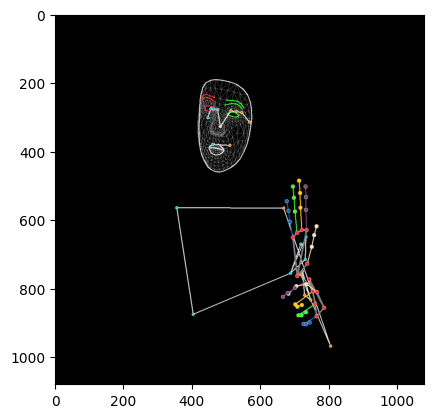

In [77]:
plot = mph.draw_landmarks_on_frame(np.zeros((1080,1080,3), dtype=np.uint8), raw_landmarks[20])
plt.imshow(plot[:,:,::-1])

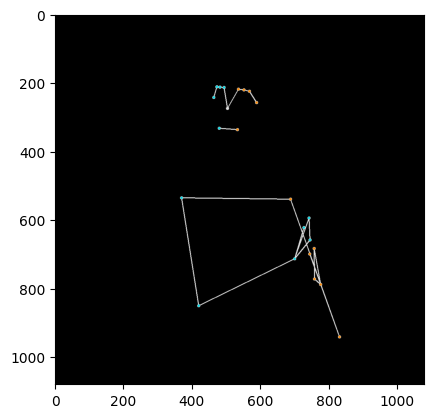

In [76]:
plot = mph.draw_landmarks_on_frame(np.zeros((1080,1080,3), dtype=np.uint8), processed_landmarks[20])
plt.imshow(plot[:,:,::-1])

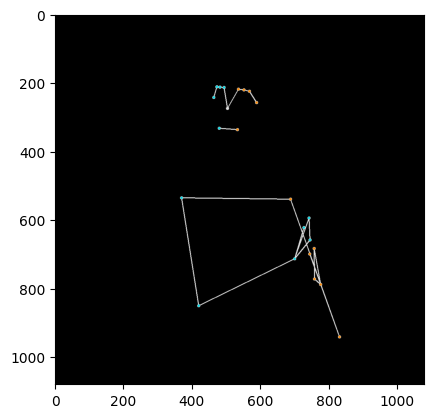